In [3]:
import pandas as pd
import numpy as np
from Bio import SeqIO

In [1]:
blast_output_file = 'left_reads_unmapped.out'
reads_file = 'left_reads_extended.fasta'
output_file = 'reads_to_extend__'

In [5]:
header = ['query', 'target', 'identity', 'alignment_light', 'number_mismatches', 'number_gaps', 
          's_q', 'e_q', 's_t', 'e_t', 'e-value', 'score']
unmapped = pd.read_csv(blast_output_file, delimiter='\t', header=None, names=header)


In [6]:
print(unmapped.head())
print(unmapped.describe())

               query target  identity  alignment_light  number_mismatches  \
0  SRR064438.7293601  ACACA    90.000               20                  2   
1  SRR064438.7313635  ACACA    89.121              239                  0   
2  SRR064438.7317161  ACACA    98.765              243                  0   
3  SRR064438.7332379  ACACA   100.000               33                  0   
4  SRR064438.7332379  ACACA   100.000               19                  0   

   number_gaps  s_q  e_q   s_t   e_t        e-value  score  
0            0   19   38  2321  2340   7.910000e-04   28.3  
1            2    1  239  3719  3507   1.020000e-93  329.0  
2            3    1  243  5513  5274  3.180000e-119  414.0  
3            0   56   88    37    69   3.240000e-13   60.8  
4            0   87  105   173   191   1.290000e-05   35.6  
          identity  alignment_light  number_mismatches  number_gaps  \
count  1560.000000      1560.000000        1560.000000  1560.000000   
mean     95.440985       101.

In [8]:
fasta_sequences = SeqIO.parse(open(reads_file),'fasta')
# with open(output_file) as out_file:
data = []
for fasta in fasta_sequences:
    data.append((fasta.id, fasta.seq.tostring()))

/Users/theo/.pyenv/versions/3.4.3/lib/python3.4/site-packages/Bio/Seq.py:343: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


In [9]:
reads = pd.DataFrame(data)
reads.columns = ['query', 'seq']
reads.head()

query                                                seq
0  SRR064438.7290443  TAGAGCTGAACCGGATGAGAAATTTTGACCTCACTGCCATTCCATG...
1  SRR064438.7292226  TTCAAGCACTGACAGTTTTTACGAGTGACTATTCAAAGAATGCACA...
2  SRR064438.7292726  AGAGCTCTGAGGATGTGGGAGAGAAGCTGGCTAAGGGCTGGACAGT...
3  SRR064438.7293073  TCTTTTCACCGTAGGTGGCCTGACTGGCATTGTATTAGCAAACTCA...
4  SRR064438.7293601  AGCAGAGCGAGTCAAATTTGTGTTTGAGACAGAAAATGGATTACTA...

In [10]:
unmapped_with_seq = pd.merge(unmapped, reads, on='query', how='left')
unmapped_with_seq.head()

query target  identity  alignment_light  number_mismatches  \
0  SRR064438.7293601  ACACA    90.000               20                  2   
1  SRR064438.7313635  ACACA    89.121              239                  0   
2  SRR064438.7317161  ACACA    98.765              243                  0   
3  SRR064438.7332379  ACACA   100.000               33                  0   
4  SRR064438.7332379  ACACA   100.000               33                  0   

   number_gaps  s_q  e_q   s_t   e_t        e-value  score  \
0            0   19   38  2321  2340   7.910000e-04   28.3   
1            2    1  239  3719  3507   1.020000e-93  329.0   
2            3    1  243  5513  5274  3.180000e-119  414.0   
3            0   56   88    37    69   3.240000e-13   60.8   
4            0   56   88    37    69   3.240000e-13   60.8   

                                                 seq  
0  AGCAGAGCGAGTCAAATTTGTGTTTGAGACAGAAAATGGATTACTA...  
1  AGTACATCGCTGACACTAGCTACATGGGTCATGCCATAGTGGTTGA...  
2  CCCGGCACGTCACCAGGCTGATGGTAATGATCTCATTATAGGCCAA...  
3  GTTCCTCCACGCAGGGGCTCCGGAATCGCCCGACCGCACACGTTGC...  
4  GTTCCTCCACGCAGGGGCTCCGGAATCGCCCGACCGCACACGTTGC...

In [21]:
# make fasta
with open(output_file + '.fasta', 'w') as f: 
    for q, s in df3[['query', 'seq']].iterrows():
        f.write('>%s\n' % s['query'])
        f.write('%s\n' % s['seq'])
        


In [22]:
# make fastq
with open(output_file + '.fasta', "r") as fasta:
    with open(output_file + '.fastq', "w") as fastq:
        for record in SeqIO.parse(fasta, "fasta"):
            record.letter_annotations["phred_quality"] = [40] * len(record)
            SeqIO.write(record, fastq, "fastq")

In [11]:
unmapped_with_seq['l_t'] = unmapped_with_seq['s_t'] - unmapped_with_seq['e_t']
unmapped_with_seq['len'] = unmapped_with_seq['seq'].str.len()

(1620, 15)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112982eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112ca1fd0>]], dtype=object)

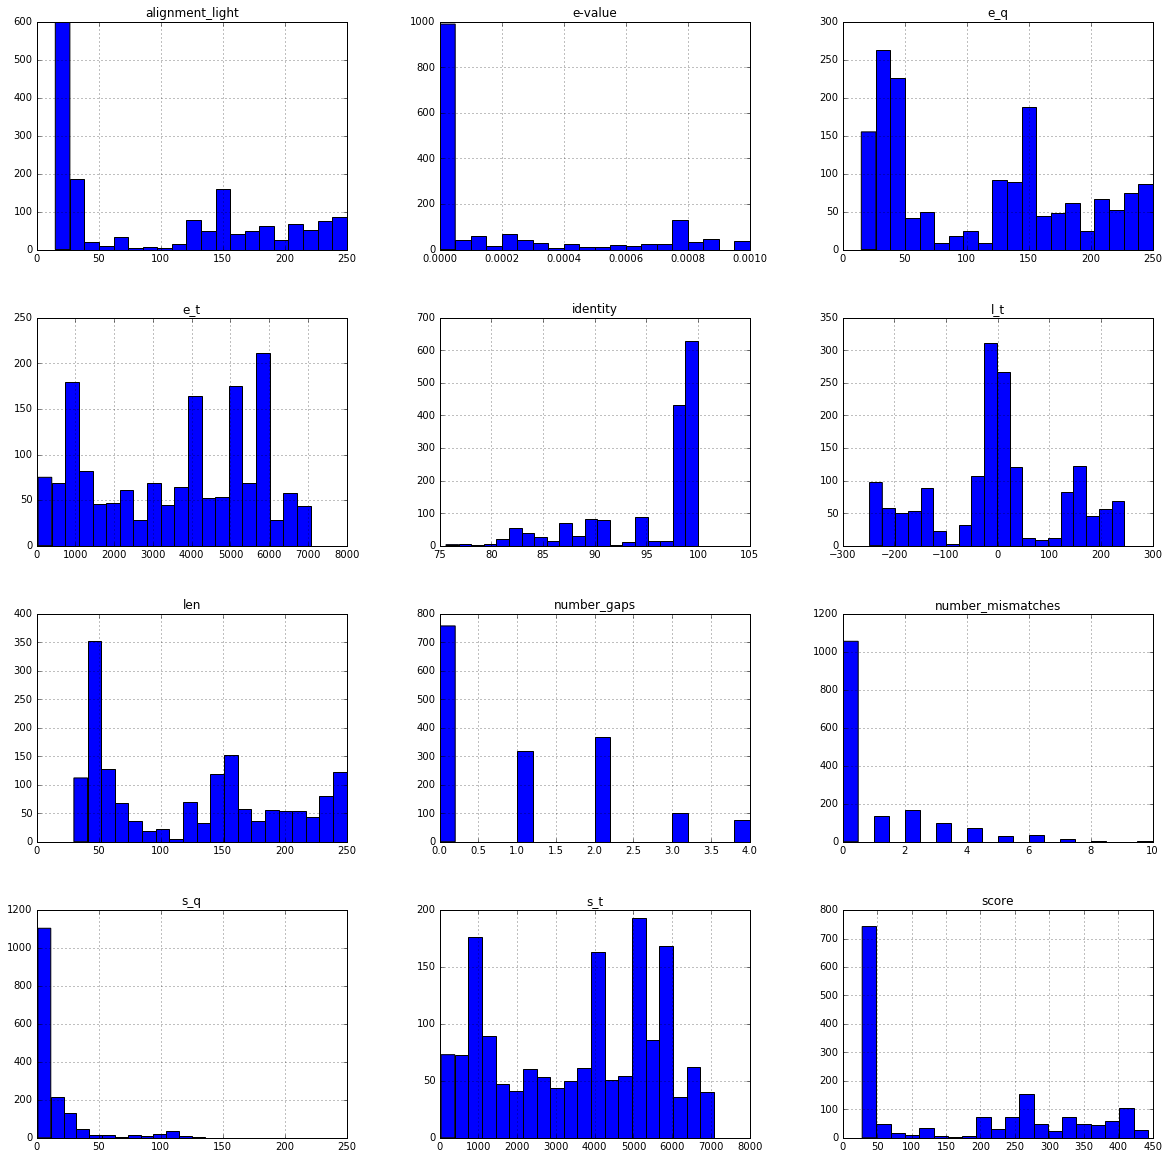

In [12]:
%matplotlib inline
# filter = df3['score']<50
filter = unmapped_with_seq['score'] > 0
# filter = df4['l_t'] > 0
print(unmapped_with_seq[filter].shape)
unmapped_with_seq[filter].sort_values(by='e_t', ascending=False).hist(figsize=(20,20), bins=20)